# **Practice_2**
1. Install packages
2. Basis
3. Span
4. Linear combination, change of basis
5. Inverse matrix

선형대수 실습은, exercise 혹은 coding 문제풀이에 집중하기 보다는, 수업시간에 배웠던 개념들을 visualize 하면서 이를 폭넓게 이해하는 데에 초점을 맞추고 있습니다. 실습에서 사용한 예시 외에도, 다양한 matrix들을 visualize 하면서 개념을 익혀보시기 바랍니다.

# 1. Install packages

> 필요한 package를 설치하고 import합니다

In [1]:
# visualization을 위한 helper code입니다.
from urllib.request import urlretrieve
import os
if os.path.isfile("plot_helper.py") is not True:
    URL = 'https://go.gwu.edu/engcomp4plot'
    urlretrieve(URL, 'plot_helper.py')

import sys
# sys.path.append('../scripts/')

# 다음 세 custom function (1)plot_vector, (2)plot_linear_transformation, (3) plot_linear_transformations
# 을 사용할 것입니다.
from plot_helper import *

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import scipy as sp
import scipy.linalg
import sympy as sy

sy.init_printing() 
np.set_printoptions(precision=3)
np.set_printoptions(suppress=True)

# 2. Basis

> 2차원 ($R^2$) 공간에서의 basis를 생각해봅시다. 임의의 horizontal vector (i.e., $\begin{bmatrix}x\\0\end{bmatrix}$) 는 $\begin{bmatrix}1\\0\end{bmatrix}$를 상수배 해서 표현할 수 있습니다. 예를 들면, vector $\begin{bmatrix} 5 \\ 0 \end{bmatrix}$는 $5 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} $으로 표현할 수 있습니다. 마찬가지로, 임의의 vertical vector (i.e., $\begin{bmatrix}0\\y\end{bmatrix}$) 는 $\begin{bmatrix}0\\1\end{bmatrix}$를 상수배 해서 표현할 수 있습니다. 위 $\begin{bmatrix}1\\0\end{bmatrix}, \begin{bmatrix}0\\1\end{bmatrix}$을 각각 $\mathbf{i}, \mathbf{j}$라고 합시다.

> $R^2$ 공간에 있는 모든 vector들은 horizontal vector + vertical vector의 합으로 표현이 가능하기 때문에 (i.e., $[x,y] = [x,0] + [0,y]$), 이 말은 즉 $R^2$에 있는 모든 벡터들은 $\mathbf{i}$와 $\mathbf{j}$의 linear combination으로 나타낼 수 있다는 말이 됩니다. 이것이 $\mathbf{i}, \mathbf{j}$의 이름이 basis vector인 이유입니다.

$$
 \left[ \begin{array}{c} 3 \\ 2  \end{array} \right] =
 3\cdot\left[ \begin{array}{c} 1 \\ 0  \end{array} \right] +
 2\cdot\left[ \begin{array}{c} 0 \\ 1  \end{array} \right] =
 3\,\mathbf{i} + 2\,\mathbf{j}
$$

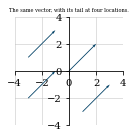

In [3]:
# Note
'''
아래의 plot_vector() 함수는 두 인자를 받습니다: (1) list of vectors, (2) list of tails (optional)
tails를 지정하지 않을 시 자연스럽게 tail은 origin으로 지정됩니다.
'''
# 예시

vectors = [(2,2)]
tails = [(-3,-2), (-3,1), (0,0), (1,-3)]
plot_vector(vectors, tails)
plt.title("The same vector, with its tail at four locations.");

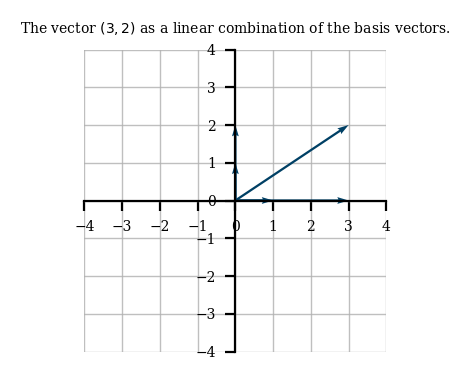

In [4]:
# basis vector
i = np.array((1,0))
j = np.array((0,1))

vec = 3*i + 2*j
vectors = [i, j, 3*i, 2*j, vec]
plot_vector(vectors)  
pyplot.title("The vector $(3,2)$ as a linear combination of the basis vectors.");

> $\begin{bmatrix}3\\2\end{bmatrix}$가 $\mathbf{i}$와 $\mathbf{j}$의 linear combination으로 표현됨($2*\mathbf{i}+3*\mathbf{j})을 알 수 있습니다.

# 3. Span

> $R^2$의 모든 vector가 basis의 linear combination으로 만들 수 있다는 말이 무엇일까요? 이는 $\mathbf{i}, \mathbf{j}$의 span이, $R^2$가 된다는 말입니다. 예를 들어 봅시다. Numpy의 randint 함수를 사용하여 $\mathbf{i}$와 $\mathbf{j}$의 linear combination 1000개를 생성하고, 이를 전부 plot해 보겠습니다.

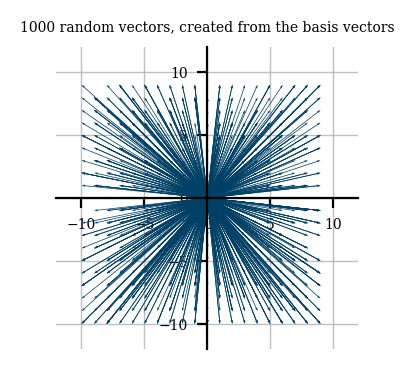

In [5]:
from numpy.random import randint
# span
vectors = []
i = numpy.array((1,0))
j = numpy.array((0,1))

for _ in range(1000):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)  # i, j (basis vecor)의 linear combination
    
plot_vector(vectors)
pyplot.title("1000 random vectors, created from the basis vectors");

> 만약 1000개가 아닌 더 많은 벡터를 생성하면 생성할수록, 위 $R^2$공간이 더욱 빼곡히 채워질 것이고, 무한히 많이 생성할 경우 결국 $R^2$를 전부 채울 수 있다는 사실을 짐작할 수 있습니다 (위 plot은 $\mathbf{i}, \mathbf{j}$의 계수를 10으로 제한한 그림이므로, 이를 제한하지 않은 경우를 상상하면 됩니다). 즉, basis vector의 span은 whole $R^2$ 공간입니다.

> 만약 $\mathbf{i}, \mathbf{j}$가 아닌 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$을 사용해서 똑같은 실험을 한다면 어떻게 될까요?

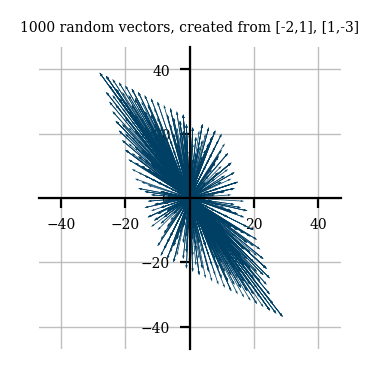

In [6]:
# TODO: 
# span
vectors = []
i = numpy.array((-2,1))
j = numpy.array((1,-3))

for _ in range(1000):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)  # i, j (basis vecor)의 linear combination
    
plot_vector(vectors)
pyplot.title("1000 random vectors, created from [-2,1], [1,-3]");

> 결론적으로, 우리는 여전히, 무수히 많은 $\mathbf{i}, \mathbf{j}$가 아닌 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$의 linear combination을 plot할 시 $R^2$를 전부 채울 수 있다는 사실을 짐작할 수 있습니다. 이 말은, 우리는 basis vector로 반드시 $\mathbf{i}, \mathbf{j}$를 사용할 필요가 없다는 말이기도 합니다.

> 그럼 basis vector로 $\mathbf{i}, \mathbf{j}$를 사용할 경우와 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$를 사용할 경우는 무엇이 다를까요? 바로 **계수**입니다.

$$ \begin{bmatrix} -7 \\ 11 \end{bmatrix} = -7 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2 * \begin{bmatrix} -2 \\ 1 \end{bmatrix} - 3 * \begin{bmatrix} 1 \\ -3 \end{bmatrix} $$

> 이 계수를 좌표라고 생각해보겠습니다. 만약 $\mathbf{i}, \mathbf{j}$를 basis로 사용할 경우, 좌표는 $(-7, 11)$이 됩니다. 만약  $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}$를 basis로 사용할 경우, 좌표는 $(2, -3)$이 됩니다.

> 다시 돌아가서, 이번엔 다른 두 vector를 span해 보겠습니다.  $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}-1\\0.5\end{bmatrix}$의 linear combination 1000개를 만들어 봅시다.



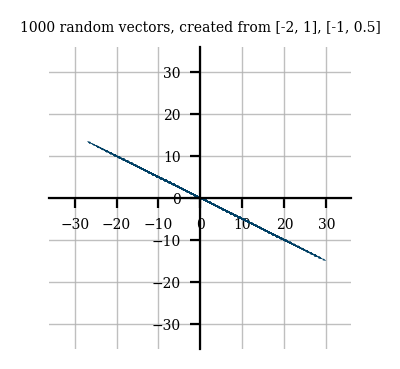

In [7]:
# TODO:
# span
vectors = []
i = numpy.array((-2,1))
j = numpy.array((-1,0.5))

for _ in range(1000):
    m = randint(-10,10)
    n = randint(-10,10)
    vectors.append(m*i + n*j)  # i, j (basis vecor)의 linear combination
    
plot_vector(vectors)
pyplot.title("1000 random vectors, created from [-2, 1], [-1, 0.5]");

> 앞선 두 예시와는 상황이 다른것을 알 수 있습니다. 두 벡터 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}-1\\0.5\end{bmatrix}$가 linearly independent 하지 않기 때문에 ($\begin{bmatrix}-2\\1\end{bmatrix} = 2 * \begin{bmatrix}-1\\0.5\end{bmatrix}$), 따라서 두 벡터의 linear combination은 $\begin{bmatrix}-2\\1\end{bmatrix}$의 상수배 밖에 나올 수 없습니다. 즉, 두 벡터의 linear combination으론 2차원 공간을 전부 채울 수 없다는 말이고, 이 말은 $\begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}-1\\0.5\end{bmatrix}$는 $R^2$의 basis가 될 수 없다는 말과 같습니다.

*   **Basis의 첫 번째 조건**: Basis는 **해당 subspace (위 예시에선 $R^2$)를 span해야 한다** (i.e., basis를linear combination해서 해당 subspace의 어떤 vector라도 만들 수 있어야 한다).

>Basis는 한 가지 조건이 더 있는데, 바로 모든 basis끼리는 서로 independent해야 한다는 것입니다. 예를 들어, $\{ \begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix} \}$는 $R^2$의 basis이지만, $\{ \begin{bmatrix}-2\\1\end{bmatrix}, \begin{bmatrix}1\\-3\end{bmatrix}, \begin{bmatrix}-1\\-2\end{bmatrix} \}$는 $R^2$의 basis가 아닙니다. 왜냐하면, $\begin{bmatrix}-2\\1\end{bmatrix} + \begin{bmatrix}1\\-3\end{bmatrix} = \begin{bmatrix}-1\\2\end{bmatrix}$ , 즉 세 vector는 서로 linearly dependent하기 때문입니다. $R^2$ 공간을 span하는데 두 개의 vector만으로도 충분한데, 3개의 vector나 있는 경우인 것입니다.

*   **Basis의 두 번째 조건**: Basis를 이루는 vector들은 **서로 linearly independent** 해야한다.

> 아래 예시를 봅시다. 아래 초록색 평면은 $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix}$, $ \begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix}$ 두 vector를 linear combination 했을 때 만들 수 있는 vector들의 공간(=subspace)입니다. 이 subspace의 dimension은 몇일까요? 


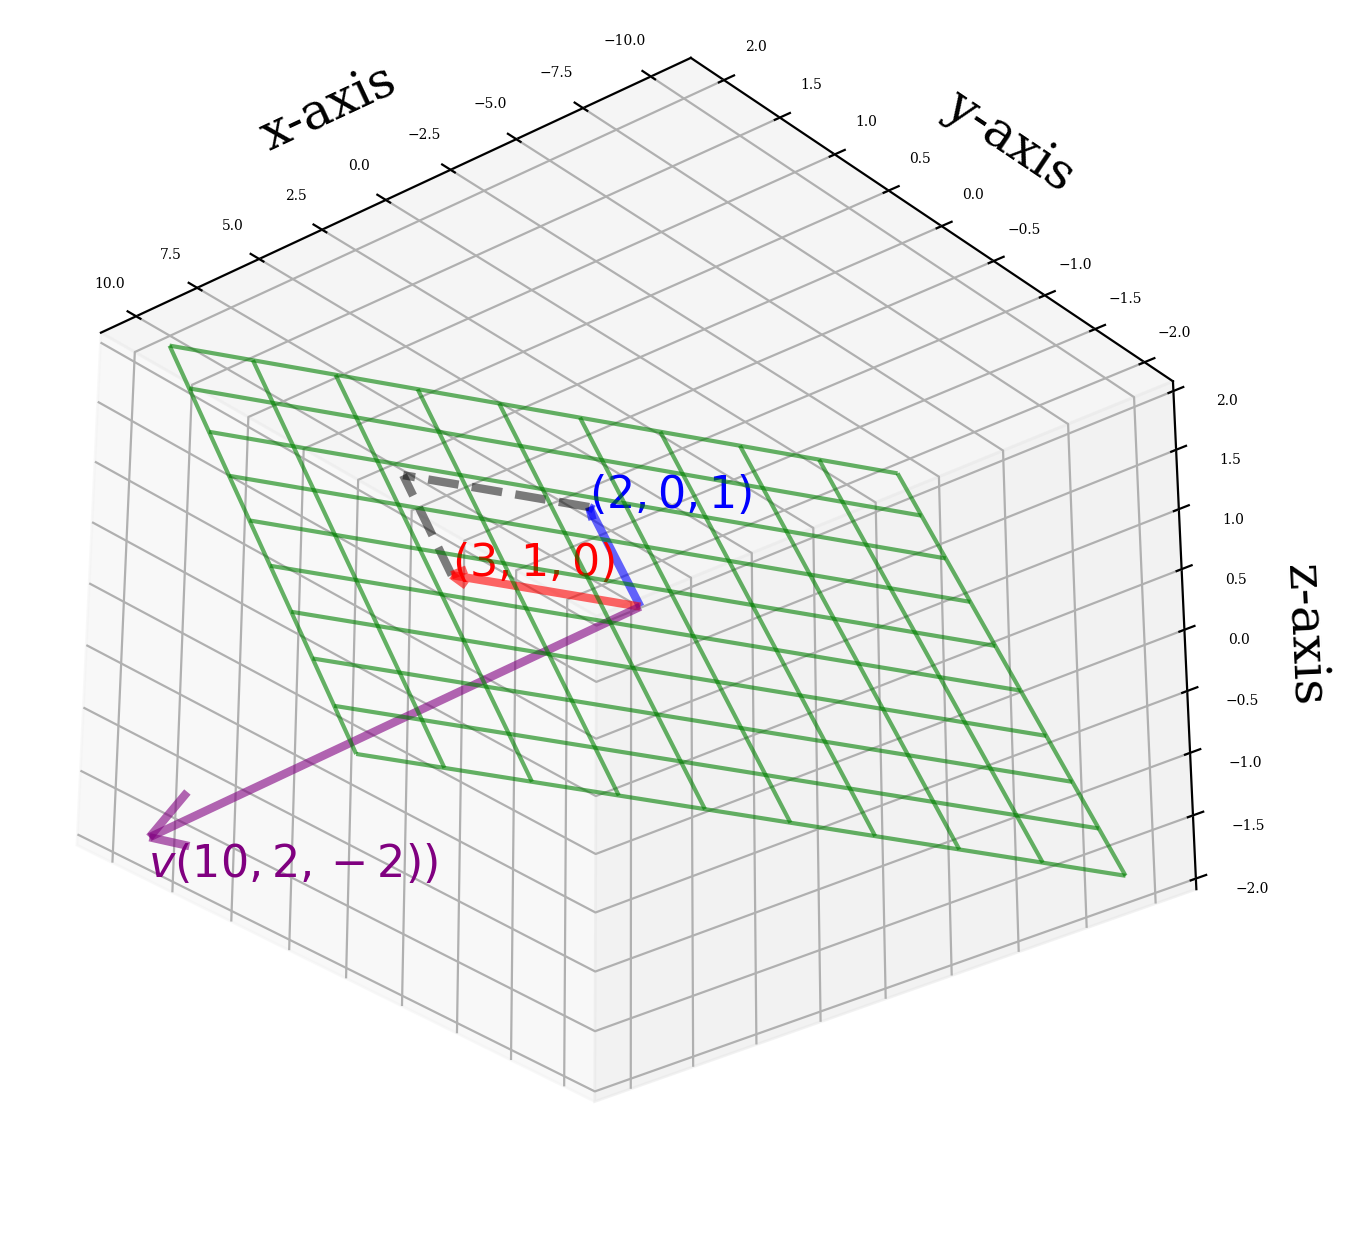

In [8]:
fig = plt.figure(figsize = (8, 8))
ax = fig.add_subplot(projection='3d')

x2 = np.linspace(-2, 2, 10)
x3 = np.linspace(-2, 2, 10)
X2, X3 = np.meshgrid(x2, x3)
X1 = 3*X2 + 2*X3
ax.plot_wireframe(X1, X2, X3, linewidth = 1.5, color = 'g', alpha = .6)

vec = np.array([[[0, 0, 0, 3, 1, 0]],
               [[0, 0, 0, 2, 0, 1]],
               [[0, 0, 0, 10, 2, -2]]])
colors = ['r', 'b', 'purple']
for i in range(vec.shape[0]):
    X, Y, Z, U, V, W = zip(*vec[i,:,:])
    ax.quiver(X, Y, Z, U, V, W, length=1, normalize=False, color = colors[i],
              arrow_length_ratio = .08, pivot = 'tail',
              linestyles = 'solid',linewidths = 3, alpha = .6)

################################Dashed Line################################

point12 = np.array([[2, 0, 1],[5, 1, 1]])
ax.plot(point12[:,0], point12[:,1], point12[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

point34 = np.array([[3, 1, 0], [5, 1, 1]])
ax.plot(point34[:,0], point34[:,1], point34[:,2], lw =3, ls = '--', color = 'black', alpha=0.5)

#################################Texts#######################################
ax.text(x = 3, y = 1, z = 0, s='$(3, 1, 0)$', color = 'red', size = 16)
ax.text(x = 2, y = 0, z = 1, s='$(2, 0, 1)$', color = 'blue', size = 16)
ax.text(x = 10, y = 2, z = -2.3, s='$v (10,2,-2))$', color = 'purple', size = 16)

ax.set_xlabel('x-axis', size = 18)
ax.set_ylabel('y-axis', size = 18)
ax.set_zlabel('z-axis', size = 18)

ax.view_init(elev=-29, azim=130)

> 정의에 의해, 초록 subspace의 dimension은 초록 subspace의 basis의 개수와 같습니다. 그렇다면 초록 subspace의 basis 개수는 몇일까요?

> 이를 확인하기 위해선 $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix}$, $ \begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix}$ 두 vector가 linearly independent한지만 확인하면 됩니다. 왜냐하면 basis의 첫 번째 조건은 이미 만족하고 있으므로 (애초에 저 둘을 span해서 만든게 초록색 subspace), 두 번째 조건인 linearly independent 여부만 확인하면 됩니다.

> 만약 linearly dependent하다면 어떻게 될까요 (i.e., $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix} = c * \begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix}$) ? 그럴 경우, $ \begin{bmatrix}3 \\ 1 \\ 0 \end{bmatrix}$가 span하는 공간(1-dimension)과 $ \begin{bmatrix}2 \\ 0 \\ 1 \end{bmatrix}$이 span하는 공간(1-dimension)이 동일하기 때문에, 최종 dimension도 1차원이 됩니다. 만약 둘이 linearly independent 하다면, 맨 위 예시의 $\{\mathbf{i},  \mathbf{j}\}$, 혹은 $\{\mathbf{a},  \mathbf{b}\}$ 처럼 둘을 span한 subspace도 2차원이 될 것입니다. 

> 위 두 벡터의 linear independence 여부를 확인해봅시다. numpy의 matrix_rank 함수를 이용하면 이를 쉽게 구할 수 있습니다. 강의에서 배웠듯, matrix $A$ 의 rank는 $A$의 column space의 dimension입니다. 따라서, $A = \begin{bmatrix} 3 & 2 \\ 1 & 0 \\ 0 & 1 \end{bmatrix}  $와 같이 설정하고 A의 rank를 구하면, 두 벡터의 linear independence 여부를 알 수 있습니다 (rank가 1이라면 두 column vector가 span하는 공간이 1차원, rank가 2라면 두 column vector가 span하는 공간이 2차원).

In [9]:
A = np.array([[3,2],[1,0],[0,1]])
np.linalg.matrix_rank(A)

2

> A의 rank가 2이므로, 두 vector는 서로 linearly independent함을 알 수 있고, 따라서 두 vector는 basis의 두 조건을 모두 만족하기 때문에 초록색 subspace의 basis가 됩니다. 결론적으로, 초록 subspace는 전체 $R^3$ 공간 안에 속해있는, 2 dimension의 subspace (i.e., 2차원 평면)가 됩니다.

> 위 그림의 v = $\begin{bmatrix} 10 \\ 2 \\ -2 \end{bmatrix}$ 를 보면, 초록색 subspace 바깥에 위치함을 알 수 있습니다. 이는 무엇을 뜻할까요?

> 잠시 Practice_1 실습으로 내용으로 돌아가서, $Ax = b$의 해를 찾는 문제를 다시 생각해봅시다. Column picture의 입장에서, 이는 A의 각 column의 계수를 찾는 문제와 같았습니다.

$$ Ax = b \\
\begin{bmatrix} 3 & 2 \\ 1 & 0 \\ 0 & 1 \end{bmatrix} \begin{bmatrix} x_1 \\ x_2 \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} \\
x_1\begin{bmatrix} 3  \\ 1  \\ 0  \end{bmatrix} + x_2\begin{bmatrix} 2 \\ 0 \\ 1 \end{bmatrix} = \begin{bmatrix} b_1 \\ b_2 \\ b_3 \end{bmatrix} 
$$

> Practice_1과 연관지어보면, 이러한 행렬 $A$는 어떠한 input $x_1, x_2$를 넣더라도, 초록색 subspace 위에 있지 않은 다른 vector (예를들면 위 그림의 보라색 $v$)를 절대 output으로 낼 수 없다는 사실을 뜻합니다. 이를 다시 말하면, b가 $A$의 column space(=초록색 subspace) 위에 존재해야만 $Ax=b$의 해가 존재한다는 말이 됩니다. 따라서 $Ax=v$의 해는 존재하지 않습니다.

In [10]:
from sympy.solvers.solveset import linsolve

x1, x2 = sy.symbols('x1 x2')
A = sy.Matrix(((3,2),(1,0),(0,1)))
b = sy.Matrix((10,2,-2))
system = A,b
linsolve(system, x1, x2)

# 4. Linear transformation, Change of basis

> 위의 Span에서 사용한 예시를 다시 가져와봅시다.

$$ \begin{bmatrix} -7 \\ 11 \end{bmatrix} = -7 * \begin{bmatrix} 1 \\ 0 \end{bmatrix} + 11 * \begin{bmatrix} 0 \\ 1 \end{bmatrix} = 2 * \begin{bmatrix} -2 \\ 1 \end{bmatrix} - 3 * \begin{bmatrix} 1 \\ -3 \end{bmatrix} $$

>  $\begin{bmatrix} -2 \\ 1 \end{bmatrix}, \begin{bmatrix} 1 \\ -3 \end{bmatrix}$를 각각 $\mathbf{a}, \mathbf{b}$로 표현하겠습니다. 만약 $\{\mathbf{a}, \mathbf{b}\}$를 basis로 사용할 경우, $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$은 이 basis의 계수가 $(2, -3)$인 경우로 표현할 수 있습니다. 만약 $\{\mathbf{i}, \mathbf{j}\}$를 basis로 사용할 경우,  $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$은 이 basis의 계수가 $(-7, 11)$인 경우로 표현할 수 있습니다 (다른 말로 하면, 이 '계수'는 해당 basis에서의 '좌표'라고 할 수 있습니다. 이후 용어는 '좌표'로 통일하겠습니다). $\begin{bmatrix} 2 \\ -3  \end{bmatrix}$,  $\begin{bmatrix} -7 \\ 11  \end{bmatrix}$을 각각 $\mathbf{c}, \mathbf{c'}$라고 하겠습니다.

<h3 align="center">

$\boldsymbol{\cdot}$   $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$은 basis $\{\mathbf{a}, \mathbf{b}\}$ 에서 좌표 $\mathbf{c} (=\begin{bmatrix} 2 \\ -3  \end{bmatrix})$ 으로 표현된다. \\
$\boldsymbol{\cdot}$   $\begin{bmatrix} -7 \\ 11 \end{bmatrix}$은 basis $\{\mathbf{i}, \mathbf{j}\}$ 에서 좌표 $\mathbf{c'} (=\begin{bmatrix} -7 \\ 11  \end{bmatrix})$ 으로 표현된다.
</h3>

>맨 위의 식을 다시 정리해 보겠습니다.

$$
  \left[ \begin{array}{c} -7 \\ 11  \end{array} \right] = 
   \begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix}  
   \left[ \begin{array}{c} 2 \\ -3  \end{array} \right] \\
   \mathbf{c'} = A\mathbf{c}
$$

> 즉 **[1] matrix $A= \begin{bmatrix} -2 & 1 \\ 1 & -3  \end{bmatrix}$에  basis $\{\mathbf{a}, \mathbf{b}\}$의 좌표 $\mathbf{c}$을 곱하면, basis $\{\mathbf{i}, \mathbf{j}\}$의 좌표 $\mathbf{c'}$을 얻을 수 있음**을 알 수 있습니다. 이에 대해 좀더 자세 알아봅시다.




In [11]:
A = np.array([[-2,1],[1,-3]])
c = np.array([2,-3])
c_ = np.array([-7,11])

A

array([[-2,  1],
       [ 1, -3]])

In [12]:
A@c

array([-7, 11])

> 위에서 보인 것처럼, $A$와 $c$를 내적하면 $\mathbf{c'}$가 나오게 됩니다. 이제 $A$에 $\mathbf{i}, \mathbf{j}$를 각각 곱해봅시다.

In [13]:
i = np.array([1,0])
j = np.array([0,1])
A@i

array([-2,  1])

In [14]:
A@j

array([ 1, -3])

> **[2] Matrix $A= \begin{bmatrix} -2 & 1 \\ 1 & -3  \end{bmatrix}$에 $\mathbf{i}$를 곱했을 경우 $\mathbf{a}$가 나오고, $\mathbf{j}$를 곱했을 경우 $\mathbf{b}$가 나옴**을 알 수 있습니다. \\
Custom helper function인 *plot_linear_transformation()* 을 이용해서 위 내용들을 visualize 해봅시다.

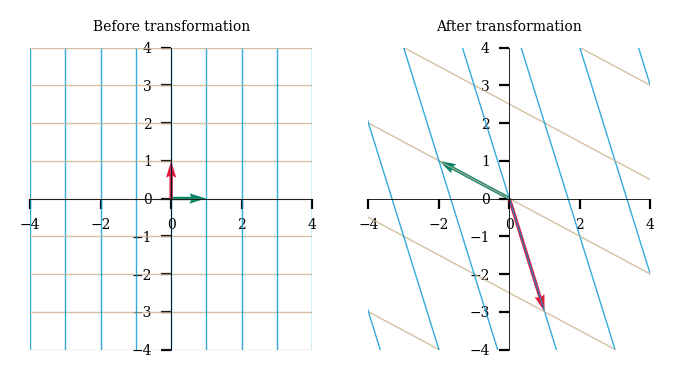

In [15]:
plot_linear_transformation(A)

> 위 그림에서 알 수 있듯, linear transformation은 원점 (0,0)은 그 자리에 둔 채, 직선들(좌측 그림)을 다른 직선들(우측 그림)으로 transform 한다는 것을 알 수 있습니다. $A$에 $\mathbf{i}$ (좌측 그림의 초록색 vector)를 곱했을 경우 $\mathbf{a}$ (우측 그림의 초록색 vector)가 나오고, $\mathbf{j}$ (좌측 그림의 빨간색 vector)를 곱했을 경우 $\mathbf{b}$ (우측 그림의 빨간색 vector)가 나옴을 알 수 있습니다 (위의 **[2]**).

### Exercise

> 다음과 같은 2x2 matrix를 각각 만들고, 이를 plot_linear_transformation을 이용해 visualize 해보시오

* matrix $A$ : $R^2$의 vector를 시계방향으로 90도 회전한다.
* matrix $B$ : $R^2$의 vector에 대해 $[x,y] \rightarrow [x+y, y]$ 를 한다.
* matrix $C$ : $R^2$의 vector에 대해 (i) A를 한 후 (ii) B를 한다.
* matrix $D$ : $R^2$의 vector에 대해 (i) B를 한 후 (ii) A를 한다.

In [16]:
# A

In [17]:
# B

In [18]:
# C

In [19]:
# D

> 다른 예시를 들어봅시다.

$$ M = \begin{bmatrix} 1 & 2 \\  2  & 1 \end{bmatrix} $$

> 첫 번째 column vector는 $\mathbf{i}$가 transform되는 vector가 되고, 두 번째 column vector는 $\mathbf{j}$가 transform되는 vector가 됩니다 (위의 **[2]**).

$$
\mathbf{i} = \begin{bmatrix} 1 \\ 0 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 1 \\ 2 \end{bmatrix} \\
\mathbf{j} = \begin{bmatrix} 0 \\ 1 \end{bmatrix}  \Rightarrow  \begin{bmatrix} 2 \\ 1 \end{bmatrix}
$$

> 어떤 임의의 vector $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right] = x \mathbf{i} + y \mathbf{j}$는, 다음과 같이 transform 될 것입니다.

$$
T(x) = T(\begin{bmatrix}x\\y\end{bmatrix})=T\Big(\begin{bmatrix}x\\0\end{bmatrix}\Big)+T\Big(\begin{bmatrix}0\\y\end{bmatrix}\Big) = T\Big(x\begin{bmatrix}1\\0\end{bmatrix}\Big)+T\Big(y\begin{bmatrix}0\\1\end{bmatrix}\Big) = x\begin{bmatrix}1\\2\end{bmatrix} + y\begin{bmatrix}2\\1\end{bmatrix}
$$

In [20]:
M = np.array([[1,2], [2,1]])
M@i

array([1, 2])

In [21]:
M@j

array([2, 1])

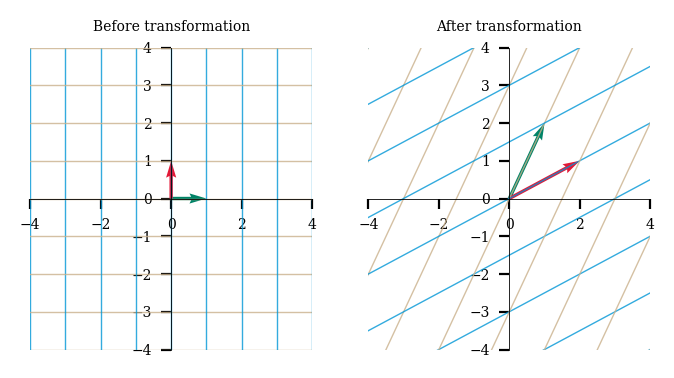

In [22]:
plot_linear_transformation(M)

> 이 transformation $M$이 특정한 vector (e.g., $\begin{bmatrix} 0.5 \\ 1 \end{bmatrix}$)를 어떻게 transform 시키는지 보기 위해서, plot_vector() 함수를 활용해서 visualize 해봅시다.

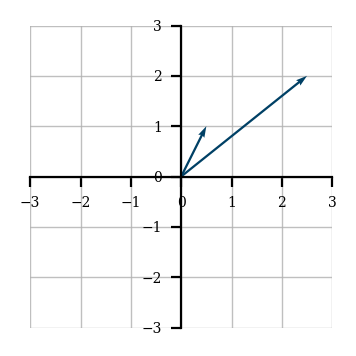

In [23]:
x = np.array((0.5,1))

vectors = [x, M.dot(x)]  
plot_vector(vectors)

> 이제 linear transformation의 맨 위에서 사용했던 $A$(=$\,\begin{bmatrix} -2 & 1 \\  1 &-3  \end{bmatrix} $ )를 다시 가져오겠습니다. 이 $A$는 $R^2$에 존재하는 임의의 vector $\mathbf{x} = \left[ \begin{array}{c} x \\ y  \end{array} \right]$ 를 

$$
  x \left[ \begin{array}{c} -2 \\ 1  \end{array} \right] + 
  y \left[ \begin{array}{c} 1 \\ -3  \end{array} \right]
$$

> 로 transform 합니다. x=2, y=-3을 대입한다면 아래와 같이 됩니다.

$$
\mathbf{c'} = A\mathbf{c}
\\
  \left[ \begin{array}{c} -7 \\ 11  \end{array} \right] = 
   \begin{bmatrix} -2 & 1 \\ 
                    1 & -3  \end{bmatrix}  
   \left[ \begin{array}{c} 2 \\ -3  \end{array} \right] 
$$

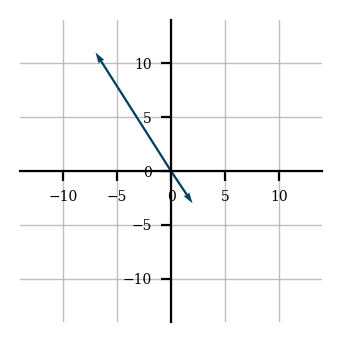

In [24]:
x = numpy.array((2,-3))
vectors = [x, A.dot(x)]
plot_vector(vectors)  # (2,3) -> (-7,11)

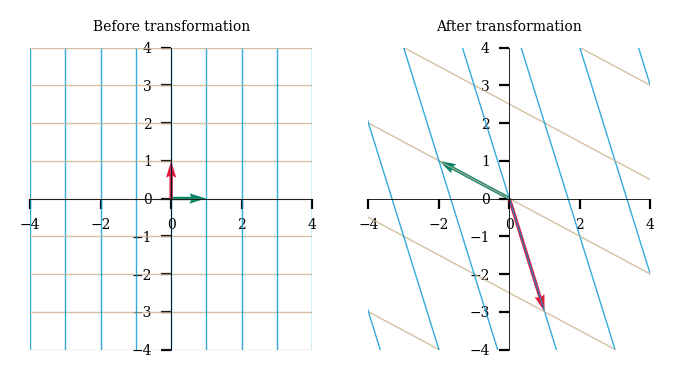

In [25]:
A = np.array([[-2,1],[1,-3]])
plot_linear_transformation(np.array(A, dtype=float))  # (1,0) -> (-2,1), (0,1) -> (1,-3)

> 즉, 위 내용을 통틀어 이를 해석한다면, $A$(=$\,\begin{bmatrix} -2 & 1 \\  1 &-3  \end{bmatrix} $ )라는 matrix는, **linear transformation와는 다른 관점으로 바라본다면**, basis $\{ \mathbf{a}, \mathbf{b}  \}$를 basis $\{ \mathbf{i}, \mathbf{j}  \}$로 바꾸는 matrix가 됩니다 (그래서 *같은* vector가  basis $\{ \mathbf{a}, \mathbf{b}  \}$에서는 좌표 (2,-3)으로 표현되고, basis $\{ \mathbf{i}, \mathbf{j}  \}$에서는 좌표 (-7,11)로 표현됨). 따라서, 이러한 관점으로 본다면, "Before transformation"의 plot은 basis가 $\{ \mathbf{a}, \mathbf{b}  \}$인 상황이고, "After transformation"의 plot은 basis를 $\{ \mathbf{a}, \mathbf{b}  \}$에서  $\{ \mathbf{i}, \mathbf{j}  \}$로 바꿔준 상황이라고 생각할 수 있습니다. 이는 "Before transformation"의 (2,-3)이 "After transformation"의 (-7,11)로 옮겨지는 것과 맞닿아 있습니다. 이를 change of basis라 하고, 다음 실습 및 eigen decomposition 강의에서 더 배우게 될 것입니다.

> Square matrix $A:R^{n\times n}$를 바라보는 2가지 방법

* linear transformation: basis를 fix시켜놓고, 해당 basis에서 vector $x_1$가 vector $x_2$로 linearly transform 되는 것을 행렬 $A$로 표현해보자 (two different vectors in the same basis) . 
* change of basis: 같은 vector $x$는 basis를 어떻게 잡냐에 따라 좌표가 달라진다. Vector $x$를 고정시키고, basis $\mathcal{A}$를 basis $\mathcal{B}$로 바꾸는 matrix A를 찾아보자 (same vector in two different bases).

> (주의: change of basis와의 차이를 강조하기 위해 linear transformation은 basis가 고정되어 있는 상태라고 했으나, 사실 basis를 고정시키지 않아도 됩니다. 예를 들면 강의에서의 예제처럼 $R^2 \rightarrow R^3$의 transformation의 경우 애초에 input과 output의 basis가 같을 수 없는 것에서 알 수 있습니다 (하나는 2차원, 하나는 3차원 vector))

> Change of basis는 아직 강의에서 다루지 않은 내용인데, 중요하기 때문에 실습에서 먼저 진행했습니다. 내일 실습에서 더 자세히 알아보도록 하겠습니다.

# 5. Inverse matrix

어제 배운 inverse matrix를 linear transformation의 입장에서 보도록 합시다.

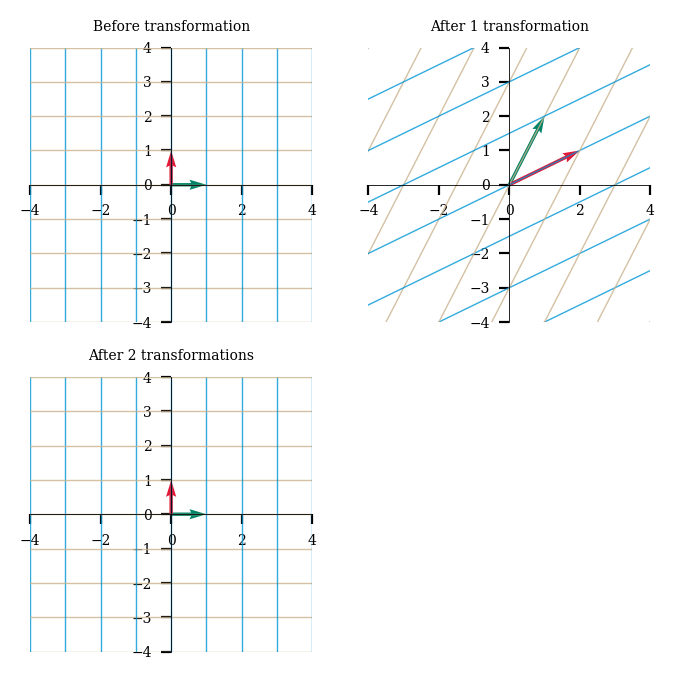

In [26]:
M = numpy.array([[1,2], [2,1]])
M_inv = inv(M)
# plot_linear_tranformation"s" 함수는 첫번째 인자, 두번째 인자를 차례대로 적용시켜줍니다.
plot_linear_transformations(M, M_inv) 

> 즉, $M^{-1}$은 $M$에 의해 linearly transform된 직선들을, 전부 원래 위치로 되돌려 놓는 linear transformation이라고 생각할 수 있습니다. 결론적으로 $M^{-1}M$은 $I$ (identity matrix)와 같음을 알 수 있습니다.

### Exercise
> Matrix $B = \begin{bmatrix} 1 & 1 \\ 0 & -1 \end{bmatrix}$에 대해 $B$와 $B^{-1}$를 plot_linear_transformations를 이용해서 plot하시오. 특이한 점이 있을까요?

# Reference

1. https://github.com/jclosure/EngComp4_landlinear